<a href="https://colab.research.google.com/github/mlacasa/Regression/blob/main/MatrizDeConfusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de análisis de Matriz de confusión

A continuación una regresión logística que clasifica una base de datos muy conocida como es IRIS.

Hay que estudiar que se requiere un grupo "test", en este caso de 30 referencias que el modelo "no conoce" para evaluar su capacidad de clasificación.

En este caso, se clasifican los 30 perfectamente.

Matriz de confusión:
 [[20  0]
 [ 0 10]]
Precisión del modelo: 1.0


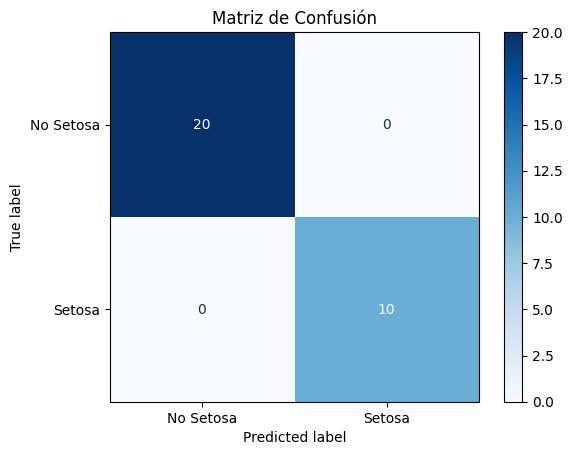

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data  # Características
y = (iris.target == 0).astype(int)  # Clasificación binaria: 1 si es 'setosa', 0 en caso contrario

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Setosa", "Setosa"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

# Ahora realizamos otro ejemplo con la base de datos TITANIC

Matriz de confusión:
 [[66 14]
 [33 30]]
Precisión del modelo: 0.6713286713286714


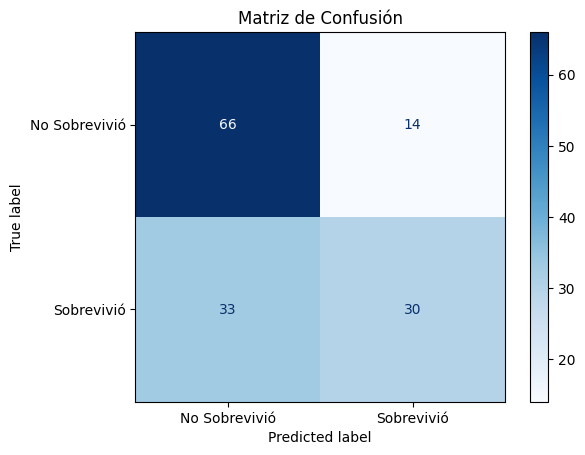

In [7]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Titanic desde seaborn
titanic_data = sns.load_dataset('titanic')

# Preprocesamiento de datos: Eliminar columnas innecesarias y tratar valores nulos
titanic_data.drop(columns=['embark_town', 'alive'], inplace=True)  # Eliminar columnas irrelevantes
titanic_data.dropna(subset=['age', 'embarked'], inplace=True)  # Eliminar filas con datos nulos

# Convertir variables categóricas a variables dummy
titanic_data = pd.get_dummies(titanic_data, columns=['sex', 'embarked', 'class'], drop_first=True)

# Manejar la columna 'age' y llenar los valores faltantes (opcionalmente)
titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].mean())

# Definir las características (X) y la variable objetivo (y)
X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

# Asegurarnos de que X solo contenga columnas numéricas
X = X.select_dtypes(include=[np.number])  # Filtrar solo columnas numéricas

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=200)  # Aumentar iteraciones si es necesario
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Sobrevivió", "Sobrevivió"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

Para analizar la matriz de confusión adecuadamente, podemos calcular diversas métricas que nos permitirán evaluar el rendimiento del modelo de regresión logística en la predicción de la supervivencia de los pasajeros del Titanic. Las métricas más comunes son:

Precisión (Accuracy): Es la proporción de predicciones correctas (tanto verdaderos positivos como verdaderos negativos) en relación al total de predicciones.

$
 \text{Precisión} = \frac{TP + TN}{TP + TN + FP + FN}
 $

Precisión Positiva (Precision): Es la proporción de verdaderos positivos en relación al total de positivos predichos.

$
 \text{Precisión Positiva} = \frac{TP}{TP + FP}
 $

Sensibilidad (Recall o True Positive Rate): Es la proporción de verdaderos positivos en relación al total de positivos reales.

$
 \text{Sensibilidad} = \frac{TP}{TP + FN}
$

Especificidad (True Negative Rate): Es la proporción de verdaderos negativos en relación al total de negativos reales.

$
 \text{Especificidad} = \frac{TN}{TN + FP}
$

F1 Score: Es una medida de la precisión y la sensibilidad. Es útil cuando hay una clase desbalanceada.

 $
 \text{F1 Score} = 2 \times \frac{\text{Precisión Positiva} \times \text{Sensibilidad}}{\text{Precisión Positiva} + \text{Sensibilidad}}
$

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir métricas
print("Precisión (Accuracy):", accuracy)
print("Precisión Positiva:", precision)
print("Sensibilidad (Recall):", recall)
print("F1 Score:", f1)

Precisión (Accuracy): 0.6713286713286714
Precisión Positiva: 0.6818181818181818
Sensibilidad (Recall): 0.47619047619047616
F1 Score: 0.5607476635514018


# Vamos a calcular qué valor umbral (threshold) podría interesar

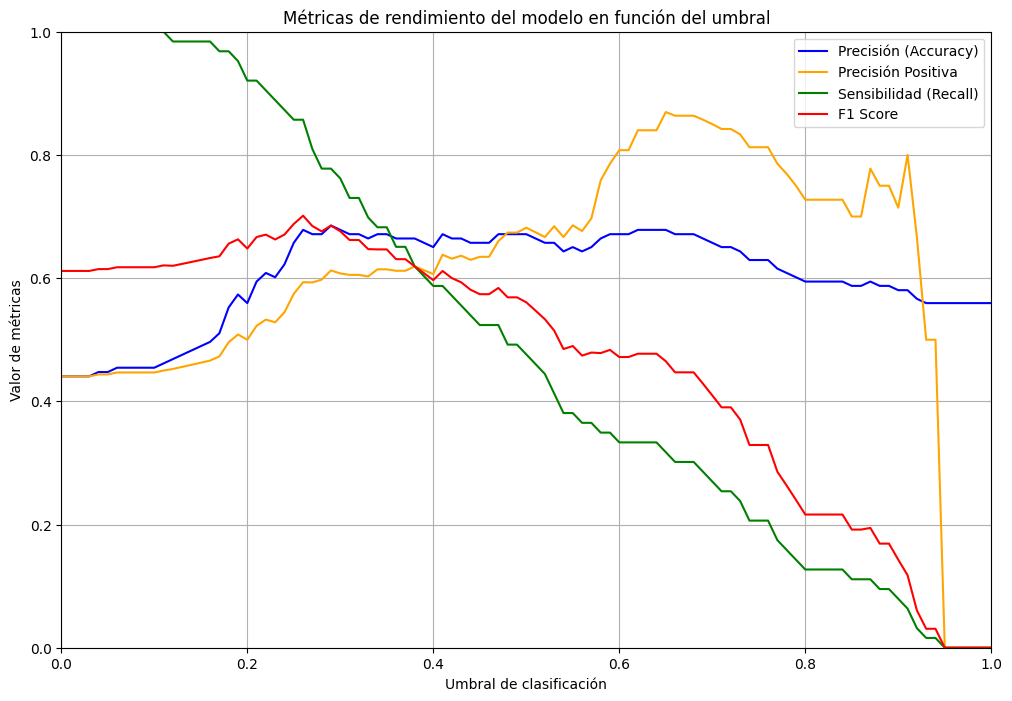

In [10]:
# Predecir probabilidades
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilidades de clase positiva

# Inicializar listas para almacenar resultados
thresholds = np.arange(0.0, 1.01, 0.01)
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Calcular métricas para cada umbral
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)  # Clasificación según el umbral
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=0))

# Gráfico de métricas en función del umbral
plt.figure(figsize=(12, 8))
plt.plot(thresholds, accuracies, label='Precisión (Accuracy)', color='blue')
plt.plot(thresholds, precisions, label='Precisión Positiva', color='orange')
plt.plot(thresholds, recalls, label='Sensibilidad (Recall)', color='green')
plt.plot(thresholds, f1_scores, label='F1 Score', color='red')
plt.title('Métricas de rendimiento del modelo en función del umbral')
plt.xlabel('Umbral de clasificación')
plt.ylabel('Valor de métricas')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

## Explicación del gráfico

En un modelo de **regresión logística**, la salida es una probabilidad que indica la posibilidad de que una observación pertenezca a la clase positiva (en este caso, que un pasajero sobrevivió). Sin embargo, para clasificar los datos en categorías discretas (0 o 1), necesitamos definir un umbral. Por ejemplo, si establecemos un umbral de 0.5, cualquier observación con una probabilidad superior a 0.5 será clasificada como 1 (sobreviviente), y aquellas con una probabilidad inferior serán clasificadas como 0 (no sobreviviente).

Detalle del Proceso
Probabilidades Predichas:
```
`y_probs = model.predict_proba(X_test)[:, 1]`
```
Aquí, model.predict_proba(X_test) devuelve una matriz de probabilidades para cada clase.

La columna [:, 1] selecciona las probabilidades de la clase positiva (sobreviviente) de cada observación en el conjunto de prueba.
Definición de Umbrales:

```
`thresholds = np.arange(0.0, 1.01, 0.01)`
```

Creamos un rango de umbrales desde 0.0 hasta 1.0 en incrementos de 0.01. Esto nos dará 101 umbrales diferentes para evaluar.
Inicialización de Listas para Resultados:

```
accuracies = []
precisions = []
recalls = []
f1_scores = []
```
Inicializamos listas vacías para almacenar los resultados de las métricas correspondientes a cada umbral.
Cálculo de Métricas para Cada Umbral:




```
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)  # Clasificación según el umbral
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
```




Iteramos sobre cada umbral en la lista de umbrales.
Clasificación según el Umbral:
```
y_pred = (y_probs >= threshold).astype(int)
```
Esta línea convierte las probabilidades en clases. Si la probabilidad de un pasajero es mayor o igual al umbral actual, se clasifica como 1 (sobreviviente), de lo contrario se clasifica como 0 (no sobreviviente).

**Cálculo de Métricas:**

Después de obtener las predicciones y_pred, calculamos las métricas de rendimiento:
Accuracy: Proporción de clasificaciones correctas.
Precisión: Proporción de verdaderos positivos en relación a todos los positivos predichos.
Sensibilidad: Proporción de verdaderos positivos en relación a todos los positivos reales.
F1 Score: Promedio armónico de precisión y sensibilidad.

Usamos las listas que inicializamos para almacenar los resultados de cada métrica para cada umbral.

**Resumen**

Este proceso de iteración sobre diferentes umbrales nos permite observar cómo varían las métricas de desempeño del modelo, lo cual es crucial para entender el balance entre la precisión y la sensibilidad. Al graficar estas métricas en función de los umbrales, se puede visualizar qué tan bien se comporta el modelo con distintos umbrales de decisión, ayudando a determinar cuál puede ser el mejor umbral para un caso específico en función de las necesidades del problema o negocio.

## Curvas ROC
La curva ROC es un gráfico que ilustra el rendimiento de un modelo de clasificación binaria a través de diferentes umbrales de decisión, mostrando la relación entre la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR).

**Tasa de Verdaderos Positivos (TPR):**

También conocida como Sensibilidad o Recall.
Se calcula como:
 $$ \text{TPR} = \frac{TP}{TP + FN} $$
Representa la proporción de positivos reales que son correctamente identificados por el modelo.
Tasa de Falsos Positivos (FPR):

Se calcula como: $$ \text{FPR} = \frac{FP}{FP + TN} $$
Representa la proporción de negativos reales que son incorrectamente identificados como positivos.
Relación con el Análisis de Umbrales
Generación de Curvas ROC:

Al igual que en el análisis de umbrales, cuando evaluamos un modelo de clasificación en función de diferentes umbrales, se pueden calcular las tasas TPR y FPR para cada umbral.
Para cada umbral, se puede determinar cuántos verdaderos positivos y falsos positivos se producen, permitiendo trazar los puntos (FPR, TPR).

**Visualización:**

La curva ROC se traza con la Tasa de Falsos Positivos en el eje X y la Tasa de Verdaderos Positivos en el eje Y.
Un modelo ideal alcanzaría una TPR del 1 (todas las positivas correctamente identificadas) y una FPR de 0 (ninguna negativa identificada incorrectamente). Este punto se encuentra en la esquina superior izquierda.

**Área Bajo la Curva (AUC):**

El área bajo la curva ROC (AUC, por sus siglas en inglés) se utiliza como una métrica para evaluar el rendimiento del modelo. Un AUC de 1 indica un modelo perfecto, mientras que un AUC de 0.5 indica un modelo que no es mejor que una clasificación aleatoria.

A medida que se evalúan diferentes umbrales, el AUC ofrece una medida global de la capacidad del modelo para discriminar entre las clases.

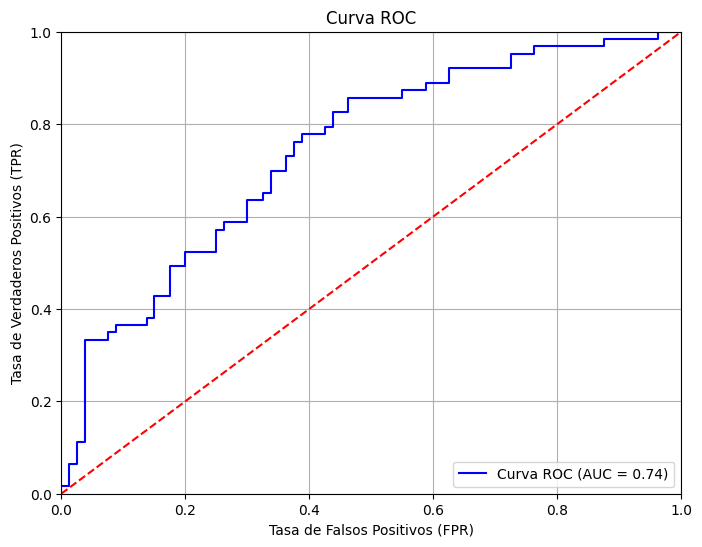

In [11]:
from sklearn.metrics import roc_curve, auc

# Predecir las probabilidades
y_probs = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**Resumen**

La relación entre el análisis de umbrales y la curva ROC es esencial, ya que ambos enfoques evalúan el modelo a través de diferentes umbrales de decisión. La curva ROC proporciona una visualización y una evaluación más refinada del rendimiento del modelo en comparación con el análisis de métricas a un único umbral. Al observar la curva ROC, se puede decidir intuitivamente un umbral que balancee la tasa de verdaderos y falsos positivos de acuerdo con los objetivos específicos del problema en cuestión.

## El índice Youden

El índice Youden es una métrica que se utiliza para evaluar la efectividad de un modelo de clasificación binaria, integrando tanto la tasa de verdaderos positivos (TPR, también conocida como sensibilidad) como la tasa de falsos positivos (FPR). Su propósito es proporcionar un único número que resuma el rendimiento del modelo a través de diferentes umbrales, y se utiliza en conjunción con el gráfico ROC (Receiver Operating Characteristic).

Definición del Índice Youden
El índice Youden se define como:

$$
J = \text{TPR} - \text{FPR}
$$

o, en términos de sensibilidad y especificidad:

$$
J = \text{Sensibilidad} + \text{Especificidad} - 1
$$

donde:

TPR (Sensibilidad) es la proporción de positivos correctos identificados por el modelo.

FPR es la proporción de negativos incorrectamente clasificados como positivos.
Especificidad es la proporción de negativos correctos identificados por el modelo.

**Interpretación del Índice Youden**

Valor del Índice Youden:

Ranges from 0 to 1: Un índice Youden de 1 indica un modelo perfecto (todas las verdaderas positivas y ninguna falsa positiva), mientras que un índice de 0 indica que el modelo es inútil (no identifica correctamente ni una sola clase).

**Optimal Threshold:** Un índice Youden más alto corresponde a un umbral que maximiza la diferencia entre la TPR y la FPR. Este umbral sería ideal para lograr un buen equilibrio en la clasificación.

**Conexión con la Curva ROC:**

En la curva ROC, se pueden calcular los índices Youden para cada punto (cada umbral). En este sentido, el índice Youden ayuda a identificar el umbral que produce la mejor combinación de sensibilidad y especificidad.
Seleccionando el Umbral Óptimo:

Si se trazan los valores del índice Youden en función de los diferentes umbrales, se puede identificar el umbral que maximiza este índice, lo que resulta en una clasificación óptima según las condiciones del problema.

**Cálculo Práctico del Índice Youden**

A continuación, te muestro cómo calcular el índice Youden para los diferentes umbrales en el contexto del modelo de regresión logística:

In [12]:
# Importar bibliotecas necesarias
from sklearn.metrics import roc_curve

# Predecir las probabilidades
y_probs = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el índice Youden
youden_index = tpr - fpr

# Encontrar el umbral óptimo (donde el índice Youden es máximo)
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]
optimal_youden_value = youden_index[optimal_idx]

# Imprimir el umbral óptimo y su valor de índice Youden
print("Umbral óptimo:", optimal_threshold)
print("Valor del índice Youden:", optimal_youden_value)

Umbral óptimo: 0.26299918157334007
Valor del índice Youden: 0.3946428571428571


# Comparativa de los gráficos

Comparar este ejercicio basado en el índice Youden, y el anterior gráfico.

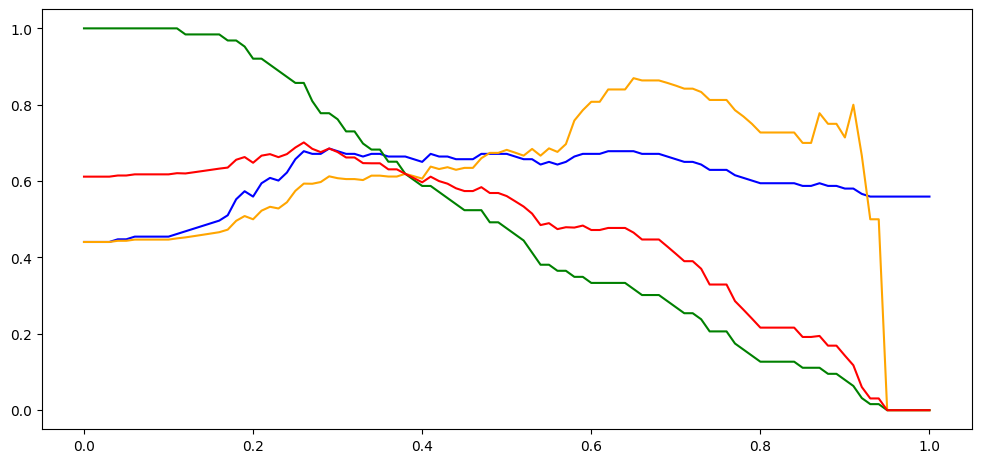

In [18]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Titanic desde seaborn
titanic_data = sns.load_dataset('titanic')

# Preprocesamiento de datos
titanic_data.drop(columns=['embark_town', 'alive'], inplace=True)
titanic_data.dropna(subset=['age', 'embarked'], inplace=True)

# Convertir variables categóricas a variables dummy
titanic_data = pd.get_dummies(titanic_data, columns=['sex', 'embarked', 'class'], drop_first=True)

# Manejar la columna 'age'
titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].mean())

# Definir características y variable objetivo
X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

# Asegurarnos de que X solo contenga columnas numéricas
X = X.select_dtypes(include=[np.number])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predecir las probabilidades
y_probs = model.predict_proba(X_test)[:, 1]

# Inicializar listas para almacenar resultados
thresholds = np.arange(0.0, 1.01, 0.01)
youden_indices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Calcular métricas e índice Youden para cada umbral
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)  # Clasificación según el umbral

    # Agregar verificaciones para evitar divisiones por cero
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Calcular TPR y FPR para el índice Youden
    tpr = recall  # Verdaderos Positivos
    fpr = 1 - precision  # Falsos Positivos (1 - Especificidad)

    youden_index = tpr - fpr
    youden_indices.append(youden_index)

# Verificar que todas las métricas tienen el mismo tamaño
assert len(accuracies) == len(thresholds)
assert len(precisions) == len(thresholds)
assert len(recalls) == len(thresholds)
assert len(f1_scores) == len(thresholds)
assert len(youden_indices) == len(thresholds)

# Graficar métricas e índice Youden en función del umbral
plt.figure(figsize=(12, 12))

# Gráficos de métricas
plt.subplot(2, 1, 1)
plt.plot(thresholds, accuracies, label='Precisión (Accuracy)', color='blue')
plt.plot(thresholds, precisions, label='Precisión Positiva', color='orange')
plt.plot(thresholds, recalls, label='Sensibilidad (Recall)', color='green')
plt.plot(thresholds, f1_scores, label='F1 Score', color='red')

# En análisis

La decisión a tomar es, qué valor umbral es el que asumimos para un mejor valor de:

- Accuracy
- Precisión Positiva
- Sensibilidad
- F1 Score

O también, errores tipo I o II.
